<a href="https://colab.research.google.com/github/AyushSahu1306/placement-prediction-logistic-regression/blob/main/predicting_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


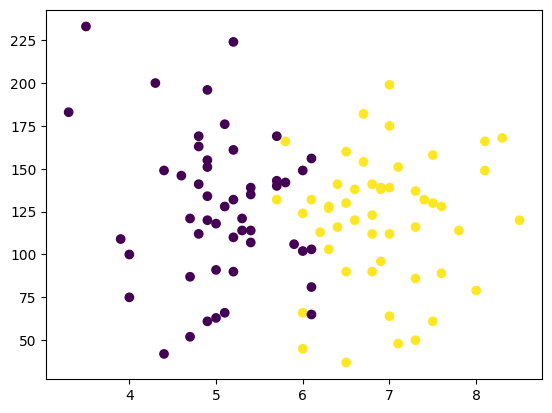

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
x = df.iloc[:,:2]
y=df.iloc[:,-1]

In [15]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [20]:
X_train= scaler.fit_transform(X_train)

In [21]:
X_test=scaler.transform(X_test)

In [23]:
X_test

array([[-1.12649159, -0.04473949],
       [-0.86406473, -1.46876465],
       [-0.95154035,  0.79003388],
       [ 2.02263071,  1.10921194],
       [ 0.97292328,  0.69182525],
       [ 0.36059394, -0.16750028],
       [-0.51416225, -0.21660459],
       [ 0.6230208 ,  0.76548173],
       [-0.51416225,  0.29899072],
       [ 0.27311832,  0.10257346]])

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [25]:
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred=model.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [28]:
y_test

24    0
7     0
76    0
53    1
21    1
13    1
41    0
74    1
49    0
70    1
Name: placement, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

<Axes: >

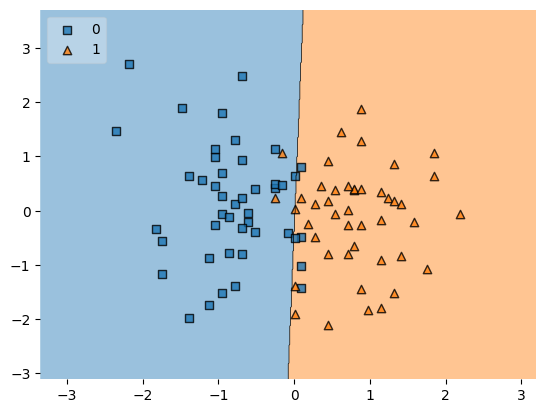

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values,clf=model,legend=2)